# Supervised Learning - Foundations: ReCell 


## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [6]:
# this will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Apply the default default seaborn theme, scaling, and color palette by using
sns.set()

# command let the output of plotting commands is displayed inline within frontends like the Jupyter notebook
%matplotlib inline

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

<IPython.core.display.Javascript object>

## Loading and exploring the data

In [7]:
# loading data
data = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

In [8]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 3454 rows and 15 columns.


<IPython.core.display.Javascript object>

In [9]:
# I'm now going to look at 10 random sample of data
np.random.seed(
    1
)  # I'm setting the random seed via np.random.seed so that i get the same random results every time
data.sample(n=10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,179.61,56.76
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,48.65,16.45
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,88.88,79.10
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,281.30,107.54
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,200.42,91.62
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,279.87,104.13
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,69.71,43.14
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,330.24,83.33
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,420.17,142.51
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,131.50,68.57


<IPython.core.display.Javascript object>

**Observations:**
* main_camera_mp column has NaN values.
* selfie_camera_mp varies from 0.3 to 20 Megapixels.
* used_price ranges from 16.45 to 142.51 euros.

In [10]:
# creating a copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [11]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


<IPython.core.display.Javascript object>

**Observations:**
* There are 11 numeric (*float* and *int* type) and 4 string (*object* type) columns in the data.
* There are few columns with missing values like selfie_camera_mp, int_memory,ram,battery and weight.

In [12]:
# checking for duplicate values
df.duplicated(
    keep="first"
).sum()  # keep = "first" : Mark duplicates as True except for the first occurrence.

0

<IPython.core.display.Javascript object>

**Observation:**
* There is no duplicate rows in the dataset.

In [13]:
# checking for missing values in the dataset
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
int_memory            4
ram                   4
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

**Observation:**
* main_camera_mp column has maximum 179 missing values.
* Columns like weight,battery,int_memory, and selfie_camera_mp has few missing values.

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [14]:
# we are going to see the statistical summary of the numerical data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

**Observations:**
* There are total 34 unique brands in the dataset.
* Most dominating os is android where oandroid is having 3214 data out of 3454.
* Device screen size varies from 5.08 inches to 30.71 inches.
* used_price varies from 4.65 euros to 749.52 euros
* Most of devices used between  91 days to 1094 days

In [15]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == "object"].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("-------" * 18)  # just for more space between

Others     502
Samsung    341
Huawei     251
LG         201
Lenovo     171
ZTE        140
Xiaomi     132
Oppo       129
Asus       122
Alcatel    121
Name: brand_name, dtype: int64
Only displaying first 10 of 34 values.
------------------------------------------------------------------------------------------------------------------------------
Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64
------------------------------------------------------------------------------------------------------------------------------
yes    2335
no     1119
Name: 4g, dtype: int64
------------------------------------------------------------------------------------------------------------------------------
no     3302
yes     152
Name: 5g, dtype: int64
------------------------------------------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

**Observations:**
* Top five most dominating brand_name in the dataset are Samsung, Lenovo, LG, Huwawei and others.
* Android is the dominating os.
* Most of the devices(2335) having 4g whereas few devices(152) have 5g capabilities.

### Univariate Analysis

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="crest"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### used_price


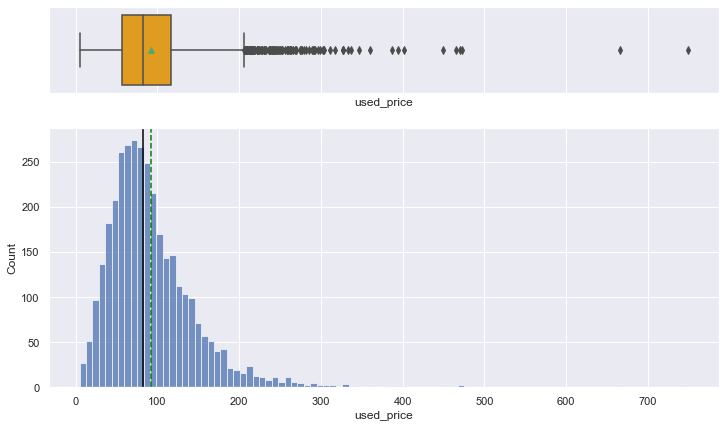

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "used_price")

**Observations:**
* Data is not normally distributed. It is rightly skewed.
* Average price of the used devices are below 100 euros.

#### new_price

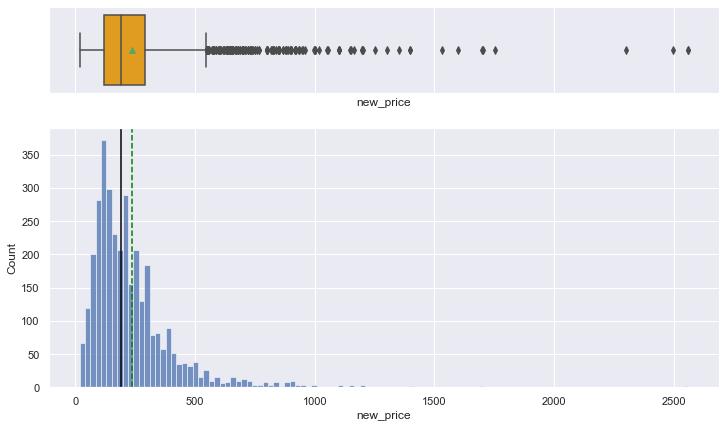

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(
    df, "new_price"
)  ## Complete the code to create histogram_boxplot for 'new_price'

**Observations:**
* new_price data is also highly right skewed.
* Average new price of the devices are approx 237 euros.

#### screen_size

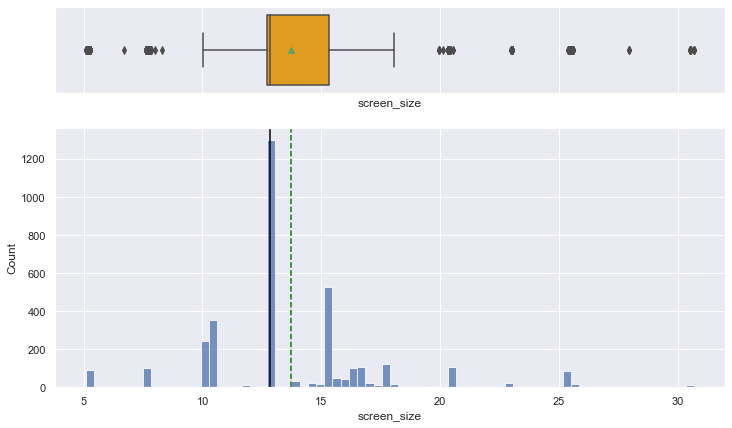

<IPython.core.display.Javascript object>

In [19]:
# By using user defined function histogram_boxplot(), we will create histogram_boxplot for 'screen_size'
histogram_boxplot(df, "screen_size")

**Observations:**
* Data is rightly skewed.
* Average screen size is less than 15 cm.

#### main_camera_mp

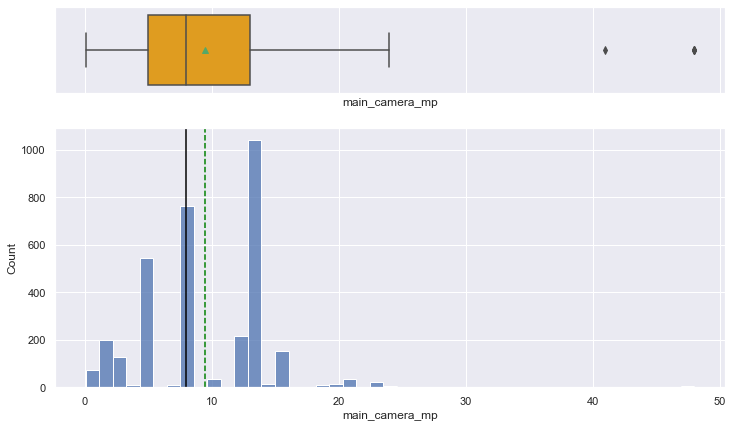

<IPython.core.display.Javascript object>

In [20]:
# By using user defined function histogram_boxplot(), we will create histogram_boxplot for 'main_camera_mp'
histogram_boxplot(df, "main_camera_mp")

**Observations:**
* Data is rightly skewed.
* Average main_camera_mp is below 10 megapixels.

#### selfie_camera_mp

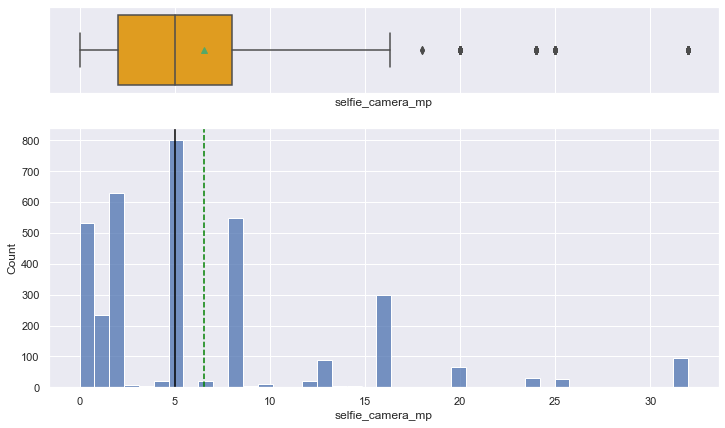

<IPython.core.display.Javascript object>

In [21]:
# By using user defined function histogram_boxplot(), we will create histogram_boxplot for 'selfie_camera_mp'
histogram_boxplot(df, "selfie_camera_mp")

#### int_memory

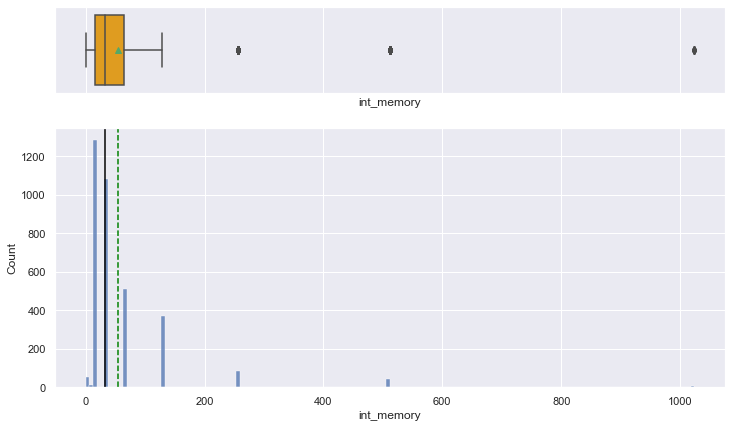

<IPython.core.display.Javascript object>

In [22]:
# By using user defined function histogram_boxplot(), we will create histogram_boxplot for 'int_memory'
histogram_boxplot(df, "int_memory")

**Observations:**
* Data is rightly skewed for internal memory.

#### ram

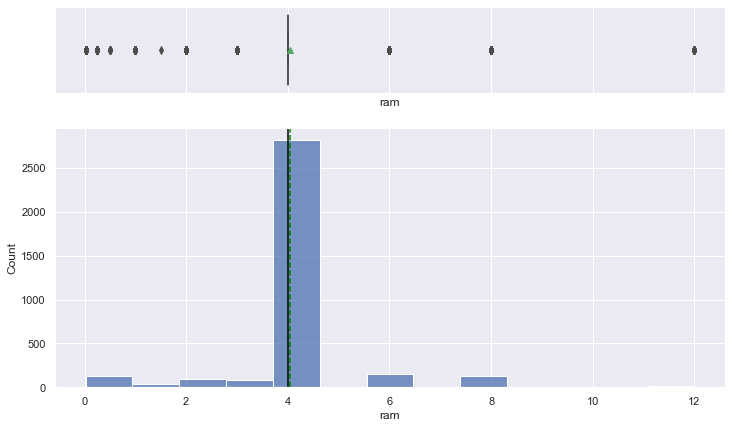

<IPython.core.display.Javascript object>

In [23]:
# By using user defined function histogram_boxplot(), we will create histogram_boxplot for 'ram'
histogram_boxplot(df, "ram")

**Observations:**
* Data is normally distributed for ram. so mean and median is almost same.
* Average ram size is 4 GB.

#### weight

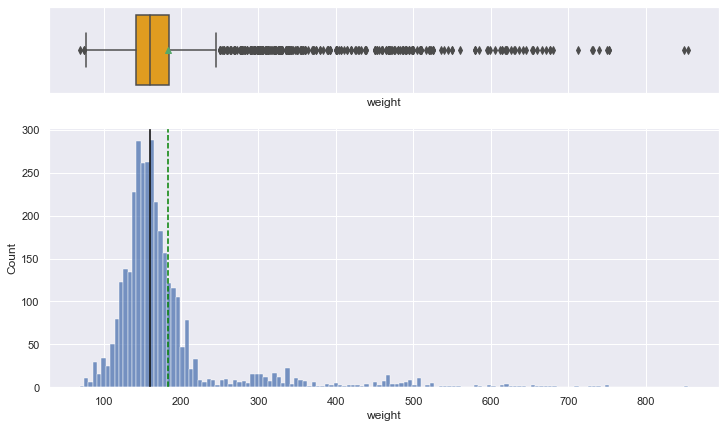

<IPython.core.display.Javascript object>

In [24]:
# By using user defined function histogram_boxplot(), we will create histogram_boxplot for 'weight'
histogram_boxplot(df, "weight")

**Observations:**
* Data is rightly skewed for weight.
* Average weight of the device is less than 200gm.

#### battery

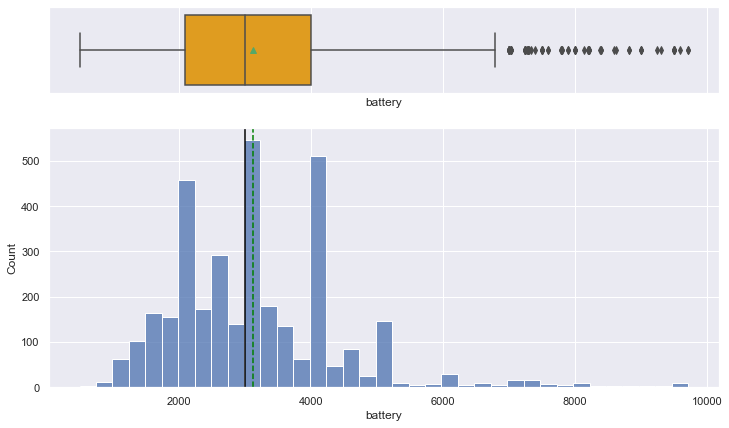

<IPython.core.display.Javascript object>

In [25]:
# By using user defined function histogram_boxplot(), we will create histogram_boxplot for 'battery'
histogram_boxplot(df, "battery")

**Observations:**
* Data is very lightly right skewed for battery.
* Average energy capacity of the battery is just below 300 mAh.

#### days_used

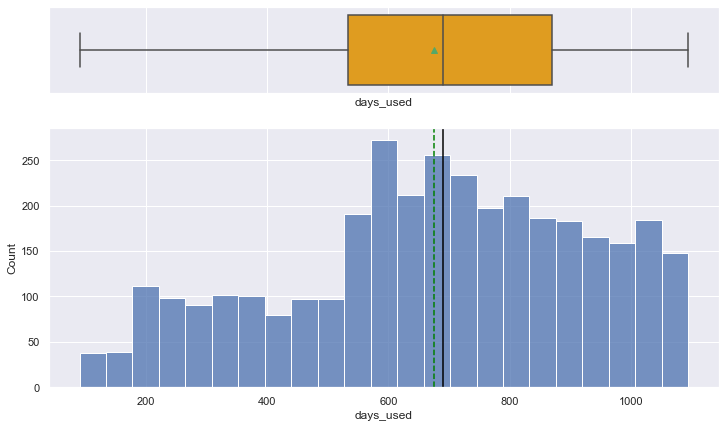

<IPython.core.display.Javascript object>

In [26]:
# By using user defined function histogram_boxplot(), we will create histogram_boxplot for 'days_used'
histogram_boxplot(df, "days_used")

**Observations:**
* Data is slightly left skewed.
* On average device were used for below 700 days.

In [27]:
# we are creating User define function labeled_barplot() to create labeled barplots for objects/categorical variable


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Set3",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### brand_name

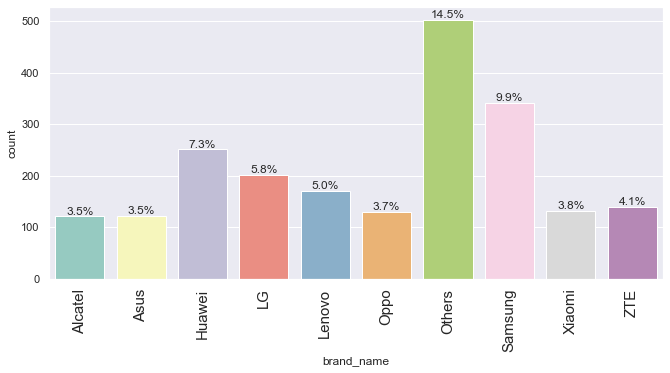

<IPython.core.display.Javascript object>

In [28]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column 'brand_name'
labeled_barplot(
    df, "brand_name", perc=True, n=10
)  # showing top 10 brand name in the dataset

**Observations:**
* Samusung, Huawei, and LG are the leading three brands in the dataset except others.

#### os


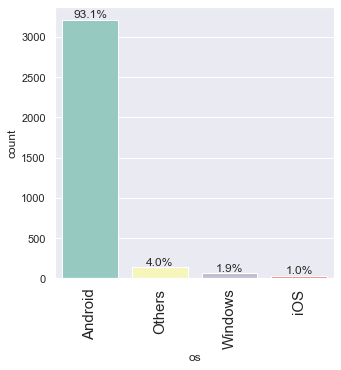

<IPython.core.display.Javascript object>

In [29]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column 'os'
labeled_barplot(df, "os", perc=True)

**Observations:**
* 93.1% of the used device market is dominated by Android os.

#### 4g

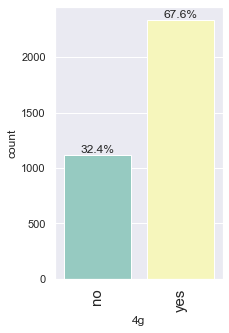

<IPython.core.display.Javascript object>

In [30]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column '4g'
labeled_barplot(
    df, "4g", perc=True
)  ## Complete the code to create labeled_barplot for '4g'

**Observations:**
* Almost 67.6% used device has the 4g capability.

#### 5g

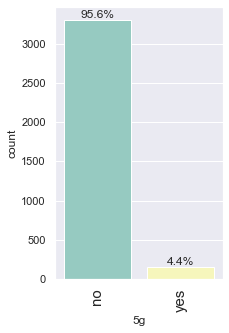

<IPython.core.display.Javascript object>

In [31]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column '5g'
labeled_barplot(df, "5g", perc=True)

**Observations:**
* Only 4.4% used device has the 5g capability.

#### release_year

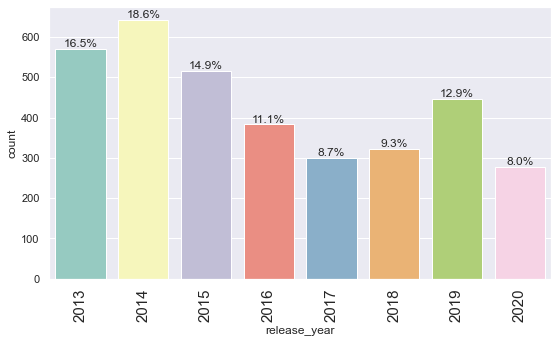

<IPython.core.display.Javascript object>

In [32]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column 'release_year'
labeled_barplot(
    df, "release_year", perc=True
)  ## Complete the code to create labeled_barplot for 'release_year'

**Observations:**
* Almost more than 50% devices were released from the year 2013 to 2015.

### Bivariate Analysis

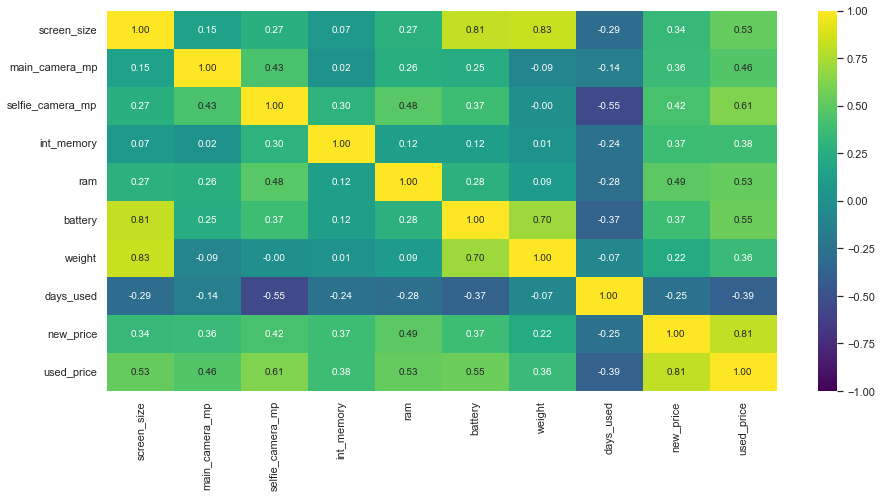

<IPython.core.display.Javascript object>

In [33]:
# we will create cols_list that contain columns of numerical data
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# since release_year is a temporal variable so we are dropping this column
cols_list.remove("release_year")
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="viridis"
)
plt.show()

**Observations:**
* screen_size and battery are highly correlated.
* screen_size and weight are highly correlated.
* new_price and used_price are highly correlated.
* days_used and selfie_camera_mp are negatively correlated.

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

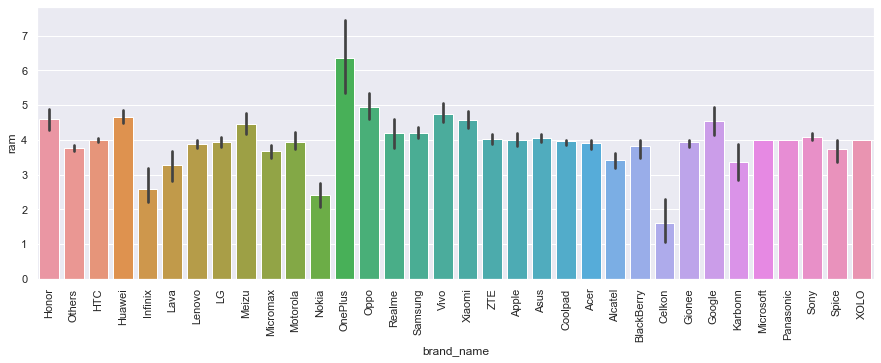

<IPython.core.display.Javascript object>

In [34]:
# we are crating barplot to show how the RAM varies across brands
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

**Observations:**
* OnePlus device has the maximum RAM which is greater than 6GB.
* Oppo,vivo,xiaomi,Humawei,Google devices have average RAM 4.5 GB.
* Most of the devices have on average 4GB ram except Celkon, Nokia and Infiniz.

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases a device's weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [35]:
# Creating a dataframe where battery is above 4500 mAh
df_large_battery = df[df.battery > 4500]
df_large_battery.shape  # shape of the newly created dataframe

(341, 15)

<IPython.core.display.Javascript object>

In [36]:
# showing top five values of the newly created dataframe
df_large_battery.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64
11,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,117.94,105.36
19,Honor,Android,25.43,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,248.90,71.37
20,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,201.14,95.23


<IPython.core.display.Javascript object>

In [37]:
# code to show average weight of the brands from highest to lowest
df_large_battery.groupby("brand_name")["weight"].mean().sort_values(ascending=False)

brand_name
Google       517.000000
Lenovo       442.721429
Apple        439.558824
Sony         439.500000
HTC          425.000000
Samsung      398.352000
Huawei       394.486486
Others       390.546341
Alcatel      380.000000
LG           366.058333
Acer         360.000000
Nokia        318.000000
Asus         313.772727
Honor        248.714286
Xiaomi       231.500000
Gionee       209.430000
Motorola     200.757143
Realme       196.833333
Vivo         195.630769
ZTE          195.400000
Oppo         195.000000
Infinix      193.000000
Panasonic    182.000000
Spice        158.000000
Micromax     118.000000
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

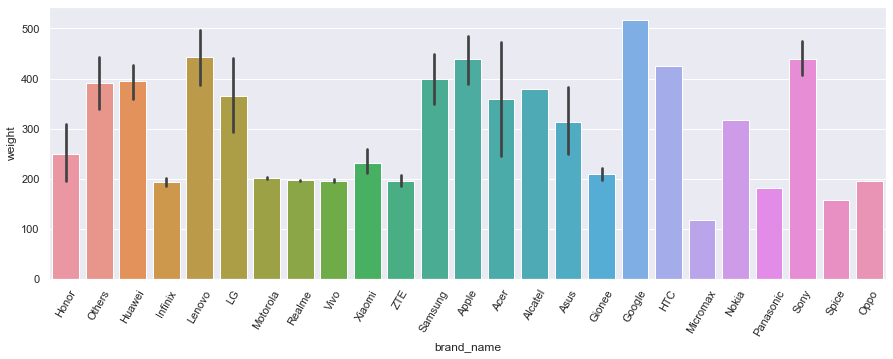

<IPython.core.display.Javascript object>

In [38]:
# we will create label barplot for 'brand_name' and 'weight' where battery is greater than 4500mAh
plt.figure(figsize=(15, 5))  # code to define the size of the fighure
sns.barplot(
    data=df_large_battery, x="brand_name", y="weight"
)  # code to create barplot for 'brand_name' and 'weight'
plt.xticks(rotation=60)  # put xlabel in 60 degree
plt.show()

**Observations:**
* There are 341 devices out of 3454 where battery size is greater than 4500mAh.
* Google device has the leading average weight of 517gm where battery is greater than 4500mAh.
* Other brand like Lenovo(avg weight 442.721429gm),Apple(avg wt 439.558824),Sony(avg wt 439.500000),HTC(avg wt 425.000000) just fall behind google where battery size is greatr than 4500mAh.




**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience.I am going to look at the datatset to see how many phones and tablets are available across different brands with a screen size larger than 6 inches?Let's create a new dataframe of only those devices which offer screen larger than 6 inches and analyze.**

In [39]:
# Creating a dataframe where screen size is greater than 6 inches
df_large_screen = df[
    df.screen_size > 6 * 2.54
]  # 1 inch = 2.54cm, so 6 inches = 6 * 2.54 cm
df_large_screen.shape  # shape of the dataframe

(1099, 15)

<IPython.core.display.Javascript object>

In [40]:
# code to show the total number of devices where secreen size is greater than 6 inches
df_large_screen.brand_name.value_counts().sum()

1099

<IPython.core.display.Javascript object>

In [41]:
# code to show the number of devices of different brand where secreen size is greater than 6 inches
df_large_screen.brand_name.value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
ZTE           17
Meizu         17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
Coolpad        3
Gionee         3
XOLO           3
Karbonn        2
Panasonic      2
Spice          2
Microsoft      1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

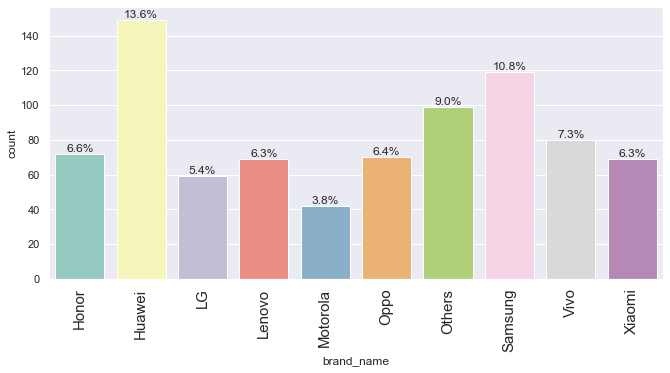

<IPython.core.display.Javascript object>

In [42]:
# we will create label barplot for 'brand_name' and 'screen_size' where screen_size is greater than 6 inches
labeled_barplot(df_large_screen, "brand_name", perc=True, n=10)  # showing top 10 values

**Observations:**
* There are 1099 devices where screen_size is greater than 6 inches.
* Amongst the brands, Huwawei, Samsung,vivo,Honour and Oppo contains almost 50% of the data.

### Data Preprocessing

### Feature Engineering
- we will now create a new column `device_category` from the `new_price` column to tag devices as budget, mid-ranger, or premium.

In [43]:
df["device_category"] = pd.cut(
    x=df.new_price,
    bins=[-np.infty, 200, 350, np.infty],
    labels=["Budget", "Mid-ranger", "Premium"],
)

df["device_category"].value_counts()

Budget        1844
Mid-ranger    1025
Premium        585
Name: device_category, dtype: int64

<IPython.core.display.Javascript object>

In [44]:
# we will see the first five columns of dataframe after creating a 'device_category' column
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,device_category
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26,Budget
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,Mid-ranger
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85,Premium
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93,Mid-ranger
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64,Budget


<IPython.core.display.Javascript object>

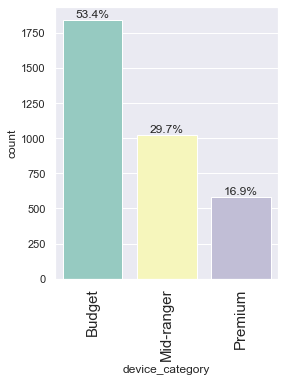

<IPython.core.display.Javascript object>

In [45]:
# By using user defined function labeled_barplot(), we will create labeled barplot for  category column 'device_category'
labeled_barplot(df, "device_category", perc=True)

**Observations:**
* Almost 53.4% devices are budget device where price is upto 200 euros.
* 29.7% devices are mid-ranger device where price is in between 200 to 350 euros.
* Only 16.9% devices are premium device where price is greater than 350 euros.

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [46]:
# Creating a dataframe having selfie_camera_mp > 8 Megapixels
df_selfie_camera = df[df["selfie_camera_mp"] > 8]
df_selfie_camera.shape  # shape of the dataframe where selfie_camera_mp > 8

(655, 16)

<IPython.core.display.Javascript object>

In [47]:
print(
    f"There are {df_selfie_camera.shape[0]} rows where selfie camera is greater than 08 megapixels out of {df.selfie_camera_mp.shape[0]} rows which is {round((len(df_selfie_camera)/len(df['selfie_camera_mp']) )* 100,2)} % of dataset"
)

There are 655 rows where selfie camera is greater than 08 megapixels out of 3454 rows which is 18.96 % of dataset


<IPython.core.display.Javascript object>

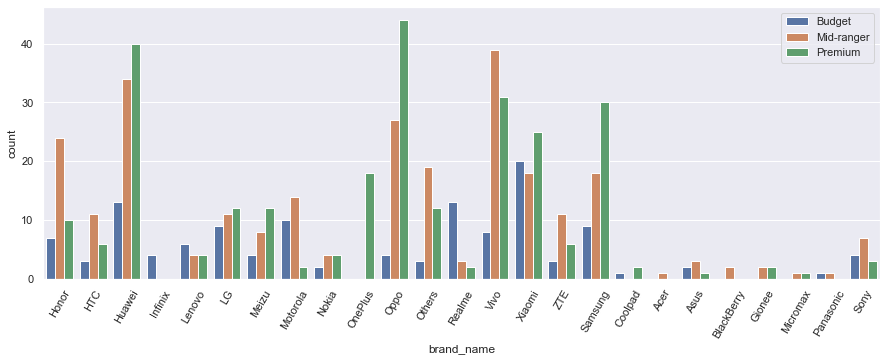

<IPython.core.display.Javascript object>

In [48]:
# Creating code to create countplot for 'brandname' with hue = 'device_category' on df_selfie_camera
plt.figure(figsize=(15, 5))
sns.countplot(data=df_selfie_camera, x="brand_name", hue="device_category")
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

**Observations:**
* 655 devices having camera greater than 8 Megapixels.
* Almost most of the companies create selfie_camera_mp greater than 8 megapixels on each device category(Budget,mid-ranger and premium).
* OnePlus only create for premium quality device where selfie_camera is greater than 8 megapixels.

**Let's do a similar analysis for rear cameras.**

In [49]:
## creating a dataframe having main_camera_mp > 16 megapixels
df_main_camera = df[df["main_camera_mp"] > 16]
df_main_camera.shape

(94, 16)

<IPython.core.display.Javascript object>

In [50]:
print(
    f"There are {df_main_camera.shape[0]} rows where main camera is greater than 16 megapixels out of {df.main_camera_mp.shape[0]} rows which is {round((len(df_main_camera)/len(df['main_camera_mp']) )* 100,2)} % of dataset"
)

There are 94 rows where main camera is greater than 16 megapixels out of 3454 rows which is 2.72 % of dataset


<IPython.core.display.Javascript object>

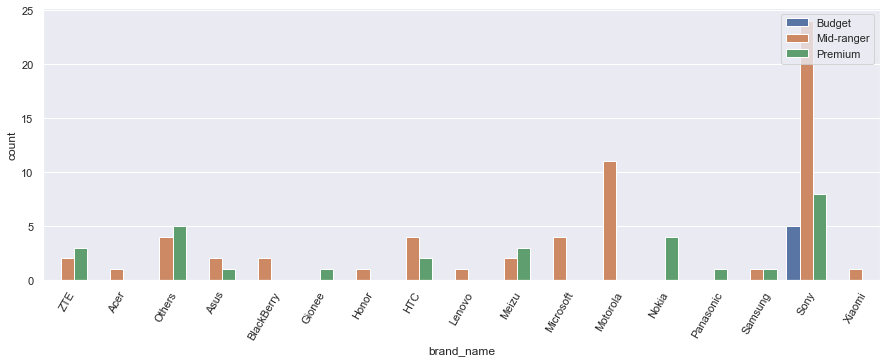

<IPython.core.display.Javascript object>

In [51]:
# Creating code to create countplot for 'brandname' with hue = 'device_category' on df_main_camera
plt.figure(figsize=(15, 5))
sns.countplot(data=df_main_camera, x="brand_name", hue="device_category")
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

**Observations:**
* There are 94 rows where main camera is greater than 16 megapixels out of 3454 rows which is 2.72 % of dataset.
* In the whole dataset only 2.72% of data is having main_camera greater than 16 megapixels.
* Only Sony create devices where main_camera is greater than 16 megapixels on all three category.

**Let's see how the price of used devices varies across the years.**

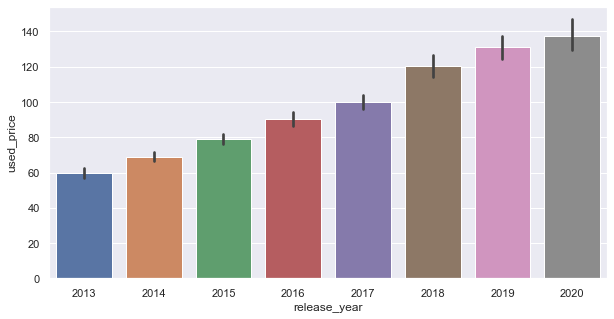

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df, x="release_year", y="used_price"
)  ## Complete the code tp create barplot for release year and used price
plt.show()

**Observations:**
* Price of the used_device is more for latest released devices.

**Let's check the distribution of 4G and 5G devices wrt price segments.**

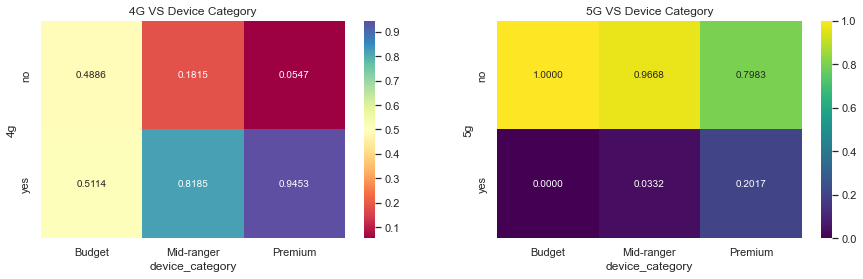

<IPython.core.display.Javascript object>

In [53]:
##  creating crosstab for 4g wrt device_category
plt.figure(figsize=(15, 4))
ax1 = plt.subplot(121)
ax1.title.set_text("4G VS Device Category")

sns.heatmap(
    pd.crosstab(df["4g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

## creating crosstab for 5g wrt device_category
ax2 = plt.subplot(122)
ax2.title.set_text("5G VS Device Category")
sns.heatmap(
    pd.crosstab(df["5g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="viridis",
)

plt.show()

**Observations:**
* 94% of premium device,81.85% of Mid-ranger device and 51.1% Budget device have 4g data capabilities.
* 20.17 % Premium devices and 3.32% Mid-ranger devices have the 5g capability.

### Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [54]:
# let's create a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [55]:
# checking for missing values
df1.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
int_memory            4
ram                   4
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
device_category       0
dtype: int64

<IPython.core.display.Javascript object>

In [56]:
# Checking top five rows of data before imputations
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,device_category
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26,Budget
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,Mid-ranger
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85,Premium
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93,Mid-ranger
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64,Budget


<IPython.core.display.Javascript object>

In [57]:
# cols_impute is the name of the columns having missing values
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]
 #code to impute missing values in cols_impute with median by grouping the data on release year and brand name
for col in cols_impute:
    df1[col] = df1.groupby(["release_year","brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    ) 


<IPython.core.display.Javascript object>

In [58]:
# checking for missing values
df1.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
int_memory            0
ram                   0
release_year          0
days_used             0
new_price             0
used_price            0
device_category       0
dtype: int64

<IPython.core.display.Javascript object>

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [59]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1.groupby("brand_name")[col].transform(
        lambda x: x.fillna(x.median())
    )  ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

<IPython.core.display.Javascript object>

In [60]:
# checking for missing values
df1.isnull().sum().sort_values(ascending=False)

main_camera_mp      10
brand_name           0
os                   0
screen_size          0
4g                   0
5g                   0
selfie_camera_mp     0
int_memory           0
ram                  0
battery              0
weight               0
release_year         0
days_used            0
new_price            0
used_price           0
device_category      0
dtype: int64

<IPython.core.display.Javascript object>

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [61]:
## code to impute the data with median of main_camera_mp
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# Finally, checking for missing values
df1.isnull().sum().sort_values()  ## Complete the code to check missing values after imputing the above columns

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
device_category     0
dtype: int64

<IPython.core.display.Javascript object>

**Observations:**
* we dont have any missing values in the dataset.

### Variable Transformations

- Let us check the numeric columns other than the "release_year"for skewness.

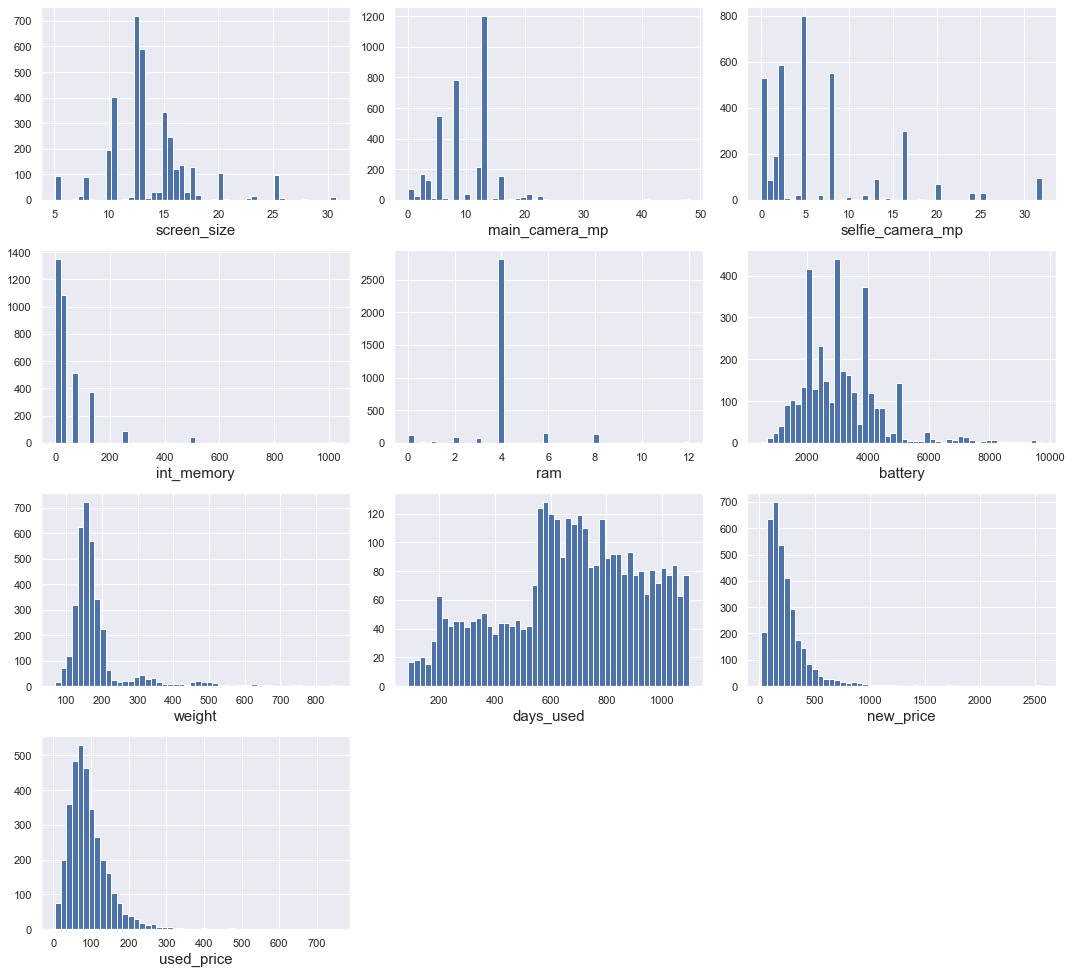

<IPython.core.display.Javascript object>

In [62]:
# creating a list
dist_cols = [item for item in df1.select_dtypes(include=np.number).columns]

# dropping release_year since it is temporal variable
dist_cols.remove("release_year")

# let's plot a histogram

plt.figure(figsize=(15, 30))

for i in range(len(dist_cols)):
    plt.subplot(9, 3, i + 1)
    plt.hist(df1[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(dist_cols[i], fontsize=15)

plt.show()

In [63]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.08,12.7000,12.830,15.340,30.71
main_camera_mp,3454.0,9.617597,4.749438,0.08,5.0000,8.000,13.000,48.00
selfie_camera_mp,3454.0,6.555067,6.968440,0.00,2.0000,5.000,8.000,32.00
int_memory,3454.0,54.528474,84.934991,0.01,16.0000,32.000,64.000,1024.00
ram,3454.0,4.032620,1.368598,0.02,4.0000,4.000,4.000,12.00
battery,3454.0,3132.577446,1298.884193,500.00,2100.0000,3000.000,4000.000,9720.00
weight,3454.0,182.636856,88.360445,69.00,142.0000,160.000,185.000,855.00
release_year,3454.0,2015.965258,2.298455,2013.00,2014.0000,2015.500,2018.000,2020.00
days_used,3454.0,674.869716,248.580166,91.00,533.5000,690.500,868.750,1094.00
new_price,3454.0,237.038848,194.302782,18.20,120.3425,189.785,291.115,2560.20


<IPython.core.display.Javascript object>

 We see that most of the columns have a very skewed distribution.
* **We will apply the log transformation to deal with skewness in the data except ram.**

In [64]:
# creating a copy of the dataframe
df2 = df1.copy()

<IPython.core.display.Javascript object>

In [65]:
# dropping the ram column as it is almost normally distributed
dist_cols.remove("ram")

# applying log transform
for col in dist_cols:
    df2[col + "_log"] = np.log(df2[col] + 1)

# dropping the original columns
df2.drop(dist_cols, axis=1, inplace=True)
df2.head()

,brand_name,os,4g,5g,ram,release_year,device_category,screen_size_log,main_camera_mp_log,selfie_camera_mp_log,int_memory_log,battery_log,weight_log,days_used_log,new_price_log,used_price_log
0,Honor,Android,yes,no,3.0,2020,Budget,2.740840,2.639057,1.791759,4.174387,8.013343,4.990433,4.852030,4.724019,4.320949
1,Honor,Android,yes,yes,8.0,2020,Mid-ranger,2.906901,2.639057,2.833213,4.859812,8.366603,5.365976,5.786897,5.523020,5.167810
2,Honor,Android,yes,yes,8.0,2020,Premium,2.873000,2.639057,2.197225,4.859812,8.343078,5.365976,5.093750,5.887409,5.117095
3,Honor,Android,yes,yes,6.0,2020,Mid-ranger,3.277145,2.639057,2.197225,4.174387,8.888895,6.175867,5.846439,5.634540,5.141254
4,Honor,Android,yes,no,3.0,2020,Budget,2.792391,2.639057,2.197225,4.174387,8.517393,5.225747,5.683580,4.954911,4.402319


<IPython.core.display.Javascript object>

**Let's check for skewness after applying the log transformation.**

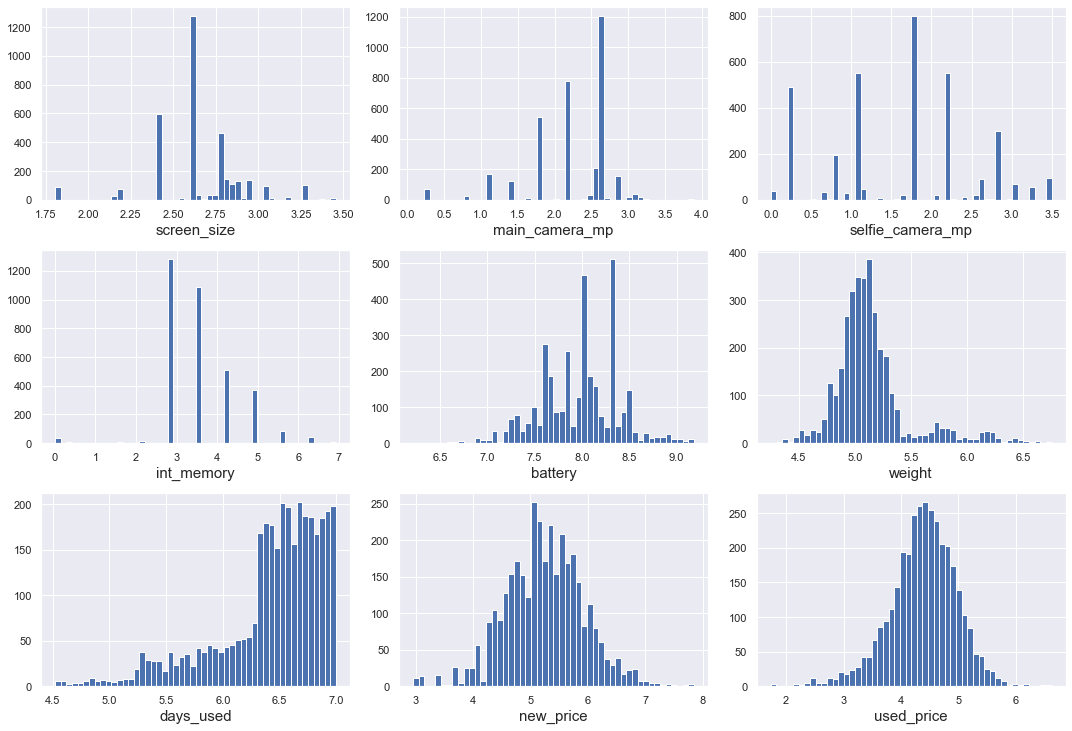

<IPython.core.display.Javascript object>

In [66]:
new_dist_cols = [item + "_log" for item in dist_cols]

plt.figure(figsize=(15, 30))

for i in range(len(dist_cols)):
    plt.subplot(9, 3, i + 1)
    plt.hist(df2[new_dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(dist_cols[i], fontsize=15)

plt.show()

* The columns are still skewed, but not as heavily as before.

In [67]:
# Lets look the dataframe after variable transformation
df2.head()

,brand_name,os,4g,5g,ram,release_year,device_category,screen_size_log,main_camera_mp_log,selfie_camera_mp_log,int_memory_log,battery_log,weight_log,days_used_log,new_price_log,used_price_log
0,Honor,Android,yes,no,3.0,2020,Budget,2.740840,2.639057,1.791759,4.174387,8.013343,4.990433,4.852030,4.724019,4.320949
1,Honor,Android,yes,yes,8.0,2020,Mid-ranger,2.906901,2.639057,2.833213,4.859812,8.366603,5.365976,5.786897,5.523020,5.167810
2,Honor,Android,yes,yes,8.0,2020,Premium,2.873000,2.639057,2.197225,4.859812,8.343078,5.365976,5.093750,5.887409,5.117095
3,Honor,Android,yes,yes,6.0,2020,Mid-ranger,3.277145,2.639057,2.197225,4.174387,8.888895,6.175867,5.846439,5.634540,5.141254
4,Honor,Android,yes,no,3.0,2020,Budget,2.792391,2.639057,2.197225,4.174387,8.517393,5.225747,5.683580,4.954911,4.402319


<IPython.core.display.Javascript object>

### Outlier Check

- Let's check for outliers in the data.

['ram', 'screen_size_log', 'main_camera_mp_log', 'selfie_camera_mp_log', 'int_memory_log', 'battery_log', 'weight_log', 'days_used_log', 'new_price_log', 'used_price_log']


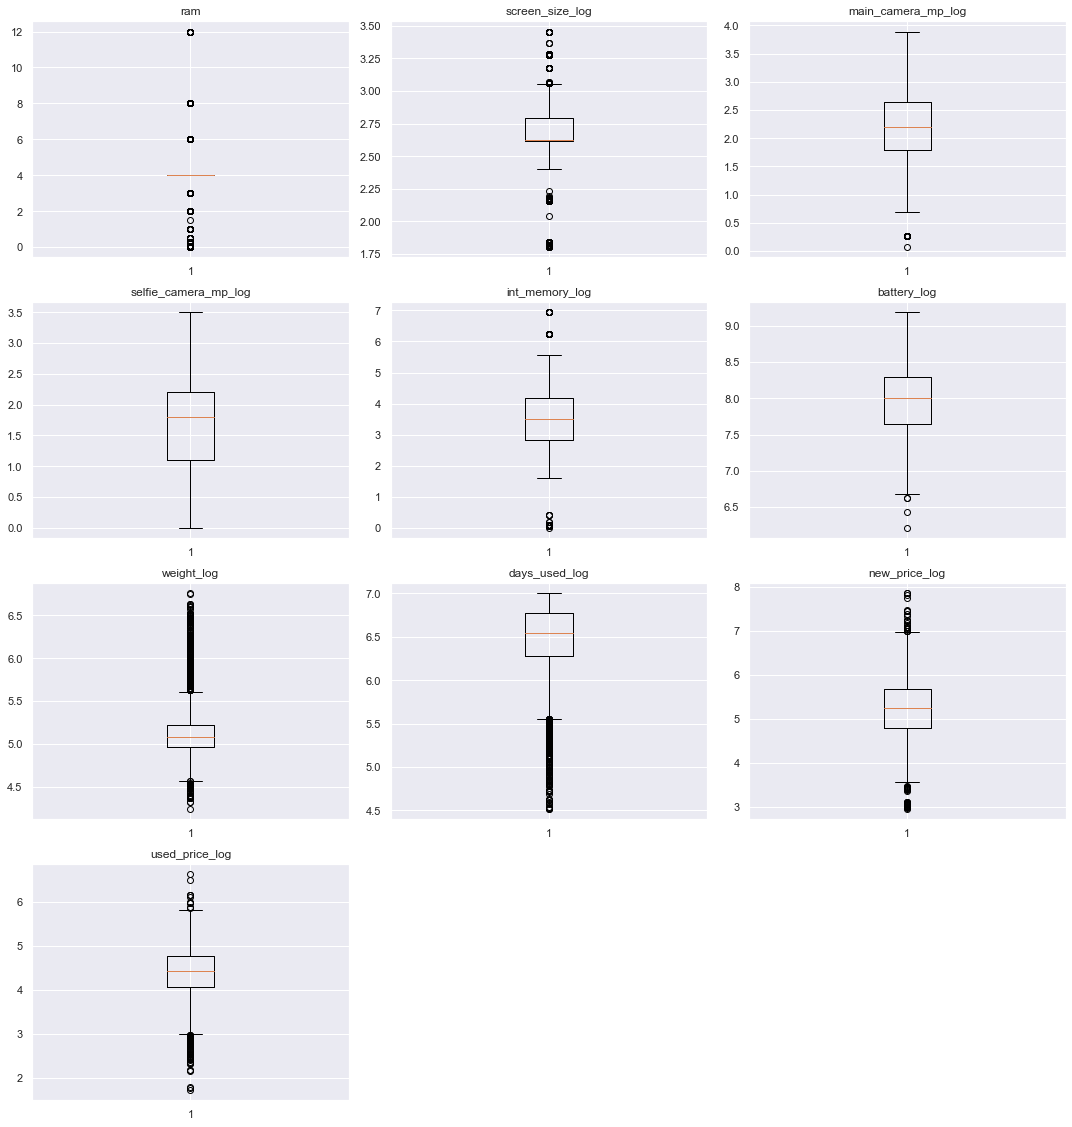

<IPython.core.display.Javascript object>

In [68]:
# outlier detection using boxplot
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("release_year")
print(numeric_columns)

plt.figure(figsize=(15, 35))

for i, variable in enumerate(numeric_columns):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
  ## code to create boxplots for all the columns
plt.show()


- Some of the columns do have outliers in them.
- We will treat these outliers by flooring and capping, i.e., we will replace the
    - lower outliers by Q1 - 1.5IQR.
    - upper outliers by Q3 + 1.5IQR.

In [69]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [70]:
# treat_out_cols define the columns having outlier
treat_out_cols = [
    "ram",
    "battery_log",
    "weight_log",
    "days_used_log",
    "screen_size_log",
    "int_memory_log",
    "days_used_log",
    "new_price_log",
    "used_price_log",
    "main_camera_mp_log",
]
# we are treating treat_out_cols by flooring and capping
df3 = treat_outliers_all(df2, treat_out_cols)

<IPython.core.display.Javascript object>

- Let's recheck the boxplots to see if outliers were treated.

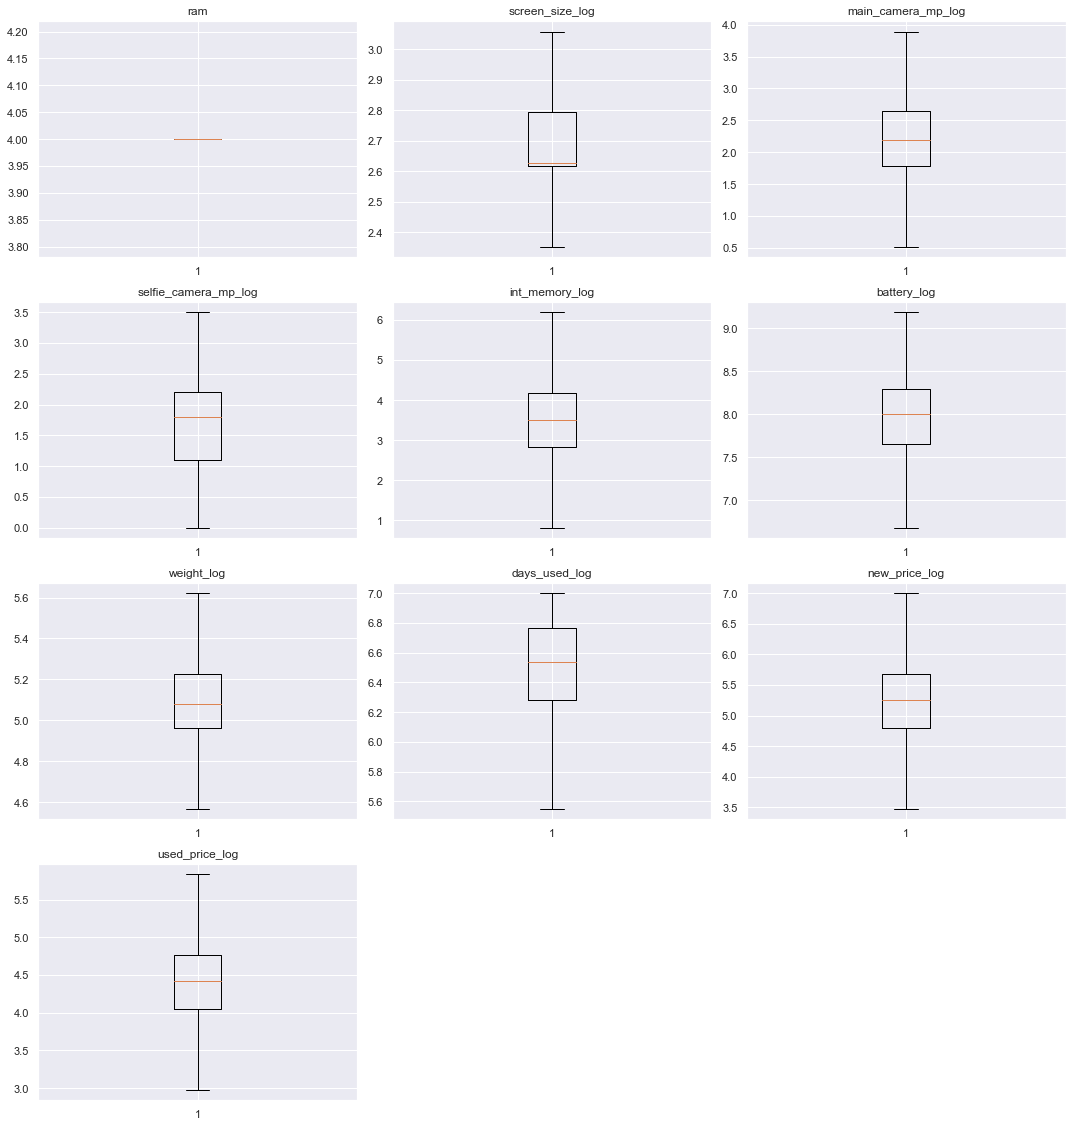

<IPython.core.display.Javascript object>

In [71]:
plt.figure(figsize=(15, 35))

for i, variable in enumerate(numeric_columns):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df3[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**
* All the outliers have been treated.

### Data Preparation for modeling

- We want to predict the used device price, so we will use the normalized version `used_price_log` for modeling.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [72]:
# Lets look at the few rows of the dataframe after treating outliers
df3.head()

,brand_name,os,4g,5g,ram,release_year,device_category,screen_size_log,main_camera_mp_log,selfie_camera_mp_log,int_memory_log,battery_log,weight_log,days_used_log,new_price_log,used_price_log
0,Honor,Android,yes,no,4.0,2020,Budget,2.740840,2.639057,1.791759,4.174387,8.013343,4.990433,5.551018,4.724019,4.320949
1,Honor,Android,yes,yes,4.0,2020,Mid-ranger,2.906901,2.639057,2.833213,4.859812,8.366603,5.365976,5.786897,5.523020,5.167810
2,Honor,Android,yes,yes,4.0,2020,Premium,2.873000,2.639057,2.197225,4.859812,8.343078,5.365976,5.551018,5.887409,5.117095
3,Honor,Android,yes,yes,4.0,2020,Mid-ranger,3.057946,2.639057,2.197225,4.174387,8.888895,5.620100,5.846439,5.634540,5.141254
4,Honor,Android,yes,no,4.0,2020,Budget,2.792391,2.639057,2.197225,4.174387,8.517393,5.225747,5.683580,4.954911,4.402319


<IPython.core.display.Javascript object>

In [73]:
# Before defining dependent and independent variables we we drop "device_category" since we created this feature
df3 = df3.drop(labels =["device_category"],axis =1)


<IPython.core.display.Javascript object>

In [74]:
# top five rows of df3 after dropping "device_category"
df3.head()

,brand_name,os,4g,5g,ram,release_year,screen_size_log,main_camera_mp_log,selfie_camera_mp_log,int_memory_log,battery_log,weight_log,days_used_log,new_price_log,used_price_log
0,Honor,Android,yes,no,4.0,2020,2.740840,2.639057,1.791759,4.174387,8.013343,4.990433,5.551018,4.724019,4.320949
1,Honor,Android,yes,yes,4.0,2020,2.906901,2.639057,2.833213,4.859812,8.366603,5.365976,5.786897,5.523020,5.167810
2,Honor,Android,yes,yes,4.0,2020,2.873000,2.639057,2.197225,4.859812,8.343078,5.365976,5.551018,5.887409,5.117095
3,Honor,Android,yes,yes,4.0,2020,3.057946,2.639057,2.197225,4.174387,8.888895,5.620100,5.846439,5.634540,5.141254
4,Honor,Android,yes,no,4.0,2020,2.792391,2.639057,2.197225,4.174387,8.517393,5.225747,5.683580,4.954911,4.402319


<IPython.core.display.Javascript object>

In [75]:
# we are using pd.get_dummies() to treat object and category columns like brand_name,os,4g and 5g for numerical conversion
## Complete the function to create dummies for independent features X
df3 = pd.get_dummies(
    df3,
    columns=df3.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  

# converting all variables are of float type
df3 = df3.astype(float)


<IPython.core.display.Javascript object>

In [76]:
# defining the dependent and independent variables
X = df3.drop(
    labels=["used_price_log"], axis=1
)  ## droping "used_price_log", "device_category" from the data
y = df3["used_price_log"]
print("Top Five rows of independent variable: X\n")
print(X.head())
print("-----" * 17)
print("Top Five rows of dependent variable: y\n")
print(y.head())

Top Five rows of independent variable: X

   ram  release_year  screen_size_log  main_camera_mp_log  \
0  4.0        2020.0         2.740840            2.639057   
1  4.0        2020.0         2.906901            2.639057   
2  4.0        2020.0         2.873000            2.639057   
3  4.0        2020.0         3.057946            2.639057   
4  4.0        2020.0         2.792391            2.639057   

   selfie_camera_mp_log  int_memory_log  battery_log  weight_log  \
0              1.791759        4.174387     8.013343    4.990433   
1              2.833213        4.859812     8.366603    5.365976   
2              2.197225        4.859812     8.343078    5.365976   
3              2.197225        4.174387     8.888895    5.620100   
4              2.197225        4.174387     8.517393    5.225747   

   days_used_log  new_price_log  brand_name_Alcatel  brand_name_Apple  \
0       5.551018       4.724019                 0.0               0.0   
1       5.786897       5.523020     

<IPython.core.display.Javascript object>

In [77]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [78]:
# print the number of train and test dataset
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

### Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

In [79]:
# Adding constant to the train data
x_train1 = sm.add_constant(x_train,has_constant='add')
# Adding constant to the test data
x_test1 = sm.add_constant(x_test,has_constant='add') 


<IPython.core.display.Javascript object>

In [80]:
# Top five rows of train data
x_train1.head()

,const,ram,release_year,screen_size_log,main_camera_mp_log,selfie_camera_mp_log,int_memory_log,battery_log,weight_log,days_used_log,new_price_log,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
3026,1.0,4.0,2014.0,2.423917,2.197225,0.262364,2.833213,7.496097,4.795791,6.709304,4.804431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1525,1.0,4.0,2016.0,2.793616,2.639057,1.791759,3.496508,8.306719,5.420535,6.373320,5.438948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1128,1.0,4.0,2015.0,2.617396,2.639057,1.791759,3.496508,7.844241,5.093750,6.590301,5.143767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3003,1.0,4.0,2015.0,2.626840,2.197225,1.791759,2.833213,8.071219,4.844187,6.685861,5.194789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2907,1.0,4.0,2017.0,2.630449,2.639057,2.833213,2.833213,7.972811,5.081404,6.329721,5.022827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<IPython.core.display.Javascript object>

In [81]:
# Top five rows of test data
x_test1.head()

,const,ram,release_year,screen_size_log,main_camera_mp_log,selfie_camera_mp_log,int_memory_log,battery_log,weight_log,days_used_log,new_price_log,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
866,1.0,4.0,2014.0,2.787477,2.197225,1.098612,2.833213,8.006701,5.332719,6.450470,5.196340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
957,1.0,4.0,2013.0,2.412336,1.423108,0.262364,6.186148,7.244942,4.948760,6.458338,3.904998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
280,1.0,4.0,2020.0,2.796671,2.197225,2.197225,3.496508,8.517393,5.225747,5.799093,4.498475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2150,1.0,4.0,2017.0,2.626840,2.639057,2.833213,4.174387,8.071219,5.003946,6.475433,5.642970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
93,1.0,4.0,2019.0,2.790551,2.639057,1.791759,3.496508,8.160804,5.192957,5.551018,5.305392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<IPython.core.display.Javascript object>

In [82]:
# we are fitting OLS model
olsmodel1 = sm.OLS(y_train, x_train1).fit()
print(olsmodel1.summary())


                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     269.7
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:55:16   Log-Likelihood:                 244.99
No. Observations:                2417   AIC:                            -394.0
Df Residuals:                    2369   BIC:                            -116.1
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

<IPython.core.display.Javascript object>

**Let's check the model performance.**
* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

* We will create a function that will print out all the above metrics in one go.

In [122]:
# Functions to compute R2,Adj. R2, Root Mean square Error(RMSE),Mean absolute percentange error(MAPE) and Mean Absolute Error(MAE)

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute mean absolute percentage error (MAPE)
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [123]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(
    olsmodel1, x_train1, y_train
)  ## code to check the performance on train data
olsmodel1_train_perf

Training Performance



ValueError: shapes (2417,16) and (49,) not aligned: 16 (dim 1) != 49 (dim 0)

<IPython.core.display.Javascript object>

In [85]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(
    olsmodel1, x_test1, y_test
)  ## Complete the code to check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.222446,0.177065,0.84456,0.836843,4.136314


<IPython.core.display.Javascript object>

**Observations**

- The train and test $R^2$ are 0.8425 and 0.8445, indicating that the model explains 84.25% and 84.45% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict used device price within a mean error of 0.177 on the test set.

- MAPE of 4.13 on the test data means that we are able to predict within 4.13% of the used device pricing.

### Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

### How to check for Multicollinearity

* There are different ways of detecting (or testing) multicollinearity. One such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of Thumb**:

    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence, the variance of $\beta_k$ is not inflated at all.
    - If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
    - The purpose of the analysis should dictate which threshold to use.

In [86]:
# Import library to compute variance Inflation factor to test multi-colinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [87]:
## Checking VIF on train data to see if there is any multi-colinearity amongst dependent variables
checking_vif(x_train1)

,feature,VIF
0,const,0.000000
1,ram,0.000000
2,release_year,6.091843
3,screen_size_log,5.306976
4,main_camera_mp_log,3.027814
5,selfie_camera_mp_log,4.735580
6,int_memory_log,2.135236
7,battery_log,4.716957
8,weight_log,4.694429
9,days_used_log,3.130521


<IPython.core.display.Javascript object>

**Observations:**
* **Features having VIF greater than are:**
     * screen_size_log,release_year,brand_name_Apple,brand_name_Huawei,brand_name_Others,brand_name_Samsung,os_iOS
* we will drop feature one by one that makes least changes in adjusted R-squared untill we find all VIF < 5

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [88]:
# treating_multicollinearity() return feature, Adj. R-squared, and RMSE after dropping columns
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [89]:
# Features having VIF greater than 5
col_list = [
    "screen_size_log",
    "release_year",
    "brand_name_Apple",
    "brand_name_Huawei",
    "brand_name_Others",
    "brand_name_Samsung",
    "os_IOS",
]
# res return columns with Adj. R-squared after dropping col
res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Samsung,0.839477,0.220804
1,brand_name_Others,0.839476,0.220805
2,release_year,0.839476,0.220805
3,brand_name_Huawei,0.839474,0.220806
4,os_IOS,0.839410,0.220850
5,brand_name_Apple,0.839315,0.220916
6,screen_size_log,0.833257,0.225041


<IPython.core.display.Javascript object>

* we will drop brand_name_Others feature since it makes the least changes in adjusted R-squared value

In [90]:
# we will drop "brand_name_Samsung" since it makes the least change in adjusted R-squared.
col_to_drop = "brand_name_Samsung"
x_train1 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test1 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Checking VIF after dropping "brand_name_Samsung"
vif = checking_vif(x_train1)
print("VIF after dropping ", col_to_drop)
vif


VIF after dropping  brand_name_Samsung


,feature,VIF
0,const,0.000000
1,ram,0.000000
2,release_year,6.090186
3,screen_size_log,5.296253
4,main_camera_mp_log,3.027746
5,selfie_camera_mp_log,4.732857
6,int_memory_log,2.134417
7,battery_log,4.716832
8,weight_log,4.692880
9,days_used_log,3.128799


<IPython.core.display.Javascript object>

* **Features having VIF greater than 5 after dropping brand_name_Samsung are:**
     * screen_size_log,release_year,brand_name_Apple,os_iOS
* we will drop feature one by one that makes least changes in adjusted R-squared untill we find all VIF < 5

In [91]:
# col_list defines features having VIF greater than 5 after dropping "brand_name_Samsung"
col_list = [
    "release_year",
    "screen_size_log",
    "brand_name_Apple",
    "os_IOS",
]
# res return columns with Adj. R-squared after dropping col
res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,release_year,0.839542,0.220759
1,os_IOS,0.839477,0.220804
2,brand_name_Apple,0.839358,0.220886
3,screen_size_log,0.833306,0.225009


<IPython.core.display.Javascript object>

* now we will drop 'release_year' as it makes least changes in the adjusted R-squared value.

In [92]:
# we will drop "release_year_log" since it makes the least change in adjusted R-squared.
col_to_drop = "release_year"
x_train1 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test1 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# calculate vif after dropping release_year
vif = checking_vif(x_train1)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  release_year


,feature,VIF
0,const,0.000000
1,ram,0.000000
2,screen_size_log,5.254612
3,main_camera_mp_log,3.026677
4,selfie_camera_mp_log,3.932059
5,int_memory_log,2.053269
6,battery_log,4.666176
7,weight_log,4.691820
8,days_used_log,2.112318
9,new_price_log,2.866320


<IPython.core.display.Javascript object>

* **Features having VIF greater than 5 after dropping `release_year_log` are:**
     * screen_size_log,brand_name_Apple,os_iOS
* we will drop feature one by one that makes least changes in adjusted R-squared untill we find all VIF < 5

In [93]:
# we will calculate VIF after dropping "release_year_log"
# col_list defines features having VIF greater than 5
col_list = [
    "screen_size_log",
    "brand_name_Apple",
    "os_iOS",
]
# res return columns with Adj. R-squared after dropping col 'brand_name_Others'
res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.839456,0.220819
1,brand_name_Apple,0.839421,0.220843
2,screen_size_log,0.833304,0.225010


<IPython.core.display.Javascript object>

Now, we will drop 'os_iOS' since it makes least changes to Adj R-squared value.

In [94]:
# we will drop "os_iOS" since it makes the least change in adjusted R-squared.
col_to_drop = "os_iOS"
x_train1 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test1 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Checking VIF after dropping feature 'os_IOS'
vif = checking_vif(x_train1)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  os_iOS


,feature,VIF
0,const,0.000000
1,ram,0.000000
2,screen_size_log,5.254549
3,main_camera_mp_log,3.009753
4,selfie_camera_mp_log,3.915562
5,int_memory_log,2.052373
6,battery_log,4.642318
7,weight_log,4.691584
8,days_used_log,2.103900
9,new_price_log,2.865931


<IPython.core.display.Javascript object>

* **Features having VIF greater than 5 after dropping `os_iOS` is:**
     * screen_size_log
* Now, we will drop 'screen_size_log' since VIF is greater than 5.

In [95]:
# we will drop screen_size_log and calculates VIF
col_to_drop = "screen_size_log"
x_train1 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test1 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Checking VIF after dropping 'screen_size_log'
vif = checking_vif(x_train1)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size_log


,feature,VIF
0,const,0.000000
1,ram,0.000000
2,main_camera_mp_log,3.005577
3,selfie_camera_mp_log,3.851056
4,int_memory_log,2.047986
5,battery_log,4.088881
6,weight_log,3.048309
7,days_used_log,2.062663
8,new_price_log,2.862785
9,brand_name_Alcatel,1.319161


<IPython.core.display.Javascript object>

* since all the feautres of independent variables have VIF less than 5 so there is no multi-colinearity.

### Interpretation of p-values (P > |t|)

* For each predictor variable there is a null hypothesis and alternate hypothesis.


   * **Null hypothesis:** Predictor variable is not significant 
   * **Alternate hypothesis :** Predictor variable is significant


* (P > |t|) gives the p-value for each predictor variable to check the null hypothesis.

* If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictor variables are not significant.

* However, due to the presence of multicollinearity in our data, the p-values will also change.

* We need to ensure that there is no multicollinearity in order to interpret the p-values.

* **Since, we have ensured that there is no multi-colinearity in the data so, we will be dropping features whose p-value > 0.05 and those are not significant.**

### Dropping statistical insignificant features with  high p-values

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [96]:
# Function that drop the features one by one with the p-value > .05

# check for p-values on each of the features of train data
cols = x_train1.columns.tolist()  # check again

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[
        cols  # check the dataset again
    ]  # check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'ram', 'main_camera_mp_log', 'selfie_camera_mp_log', 'int_memory_log', 'battery_log', 'weight_log', 'new_price_log', 'brand_name_BlackBerry', 'brand_name_Karbonn', 'brand_name_Nokia', 'brand_name_Others', 'os_Others']


<IPython.core.display.Javascript object>

In [97]:
# Defining train and test data after removing features with p value > 0.05
x_train1 = x_train1[selected_features]
x_test1 = x_test1[selected_features]

<IPython.core.display.Javascript object>

In [98]:
# Fitting the model after dropping feature with high p value 
olsmodel2 = sm.OLS(y_train,x_train1).fit() 
print(olsmodel2.summary())


                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1100.
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:55:18   Log-Likelihood:                 182.41
No. Observations:                2417   AIC:                            -340.8
Df Residuals:                    2405   BIC:                            -271.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

<IPython.core.display.Javascript object>

In [99]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train1, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.224381,0.177237,0.834165,0.833268,4.150667


<IPython.core.display.Javascript object>

In [100]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(
    olsmodel2, x_test1, y_test
)  ## Complete the code to check performance on test data
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.22742,0.180874,0.83753,0.835466,4.23916


<IPython.core.display.Javascript object>

**After dropping the features causing strong multi-collinearity and the statistically insignificant ones, our model performance hasn't dropped sharply (adj. R-squared has dropped from 0.839 to 0.835). This shows that these variables did not have much predictive power.**

### Assumptions of Linear Regression

These assumptions are essential conditions that should be met before we draw inferences regarding the model estimates or use the model to make a prediction.
For Linear Regression, we need to check if the following assumptions hold:-
1. Linearity 
2. Independence 
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

**Now we'll check the rest of the assumptions on *olsmodel2*.**

*  **Linearity of variables**

*  **Independence of error terms**

*  **Normality of error terms**

*  **No Heteroscedasticity**

#### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.

In [101]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()
## Code to store the actual values
df_pred["Actual Values"] = y_train
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.104130,3.779418,0.324712
1525,4.460029,4.744609,-0.284580
1128,4.328626,4.409881,-0.081255
3003,4.295788,4.217009,0.078778
2907,4.467975,4.454192,0.013783


<IPython.core.display.Javascript object>

#### TEST FOR LINEARITY AND INDEPENDENCE

**Purpose of the test**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**Ways to check linearity**

* Making a plot of fitted values vs residuals. If they don't follow any pattern (the curve is a straight line), then we say the model is linear otherwise model is showing signs of non-linearity.

**Fixing if this assumption is not followed?**
* We can try different transformations.

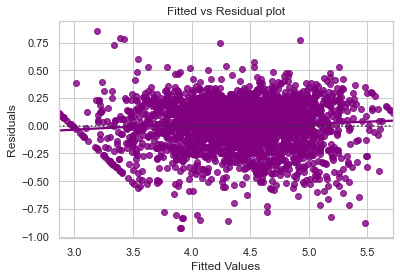

<IPython.core.display.Javascript object>

In [102]:
# let's plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* We can observe a pattern in the residual vs fitted values, hence we will try to transform the continous variables in the data.

In [103]:
# columns in training set
x_train1.columns

Index(['const', 'ram', 'main_camera_mp_log', 'selfie_camera_mp_log',
       'int_memory_log', 'battery_log', 'weight_log', 'new_price_log',
       'brand_name_BlackBerry', 'brand_name_Karbonn', 'brand_name_Nokia',
       'brand_name_Others', 'os_Others'],
      dtype='object')

<IPython.core.display.Javascript object>

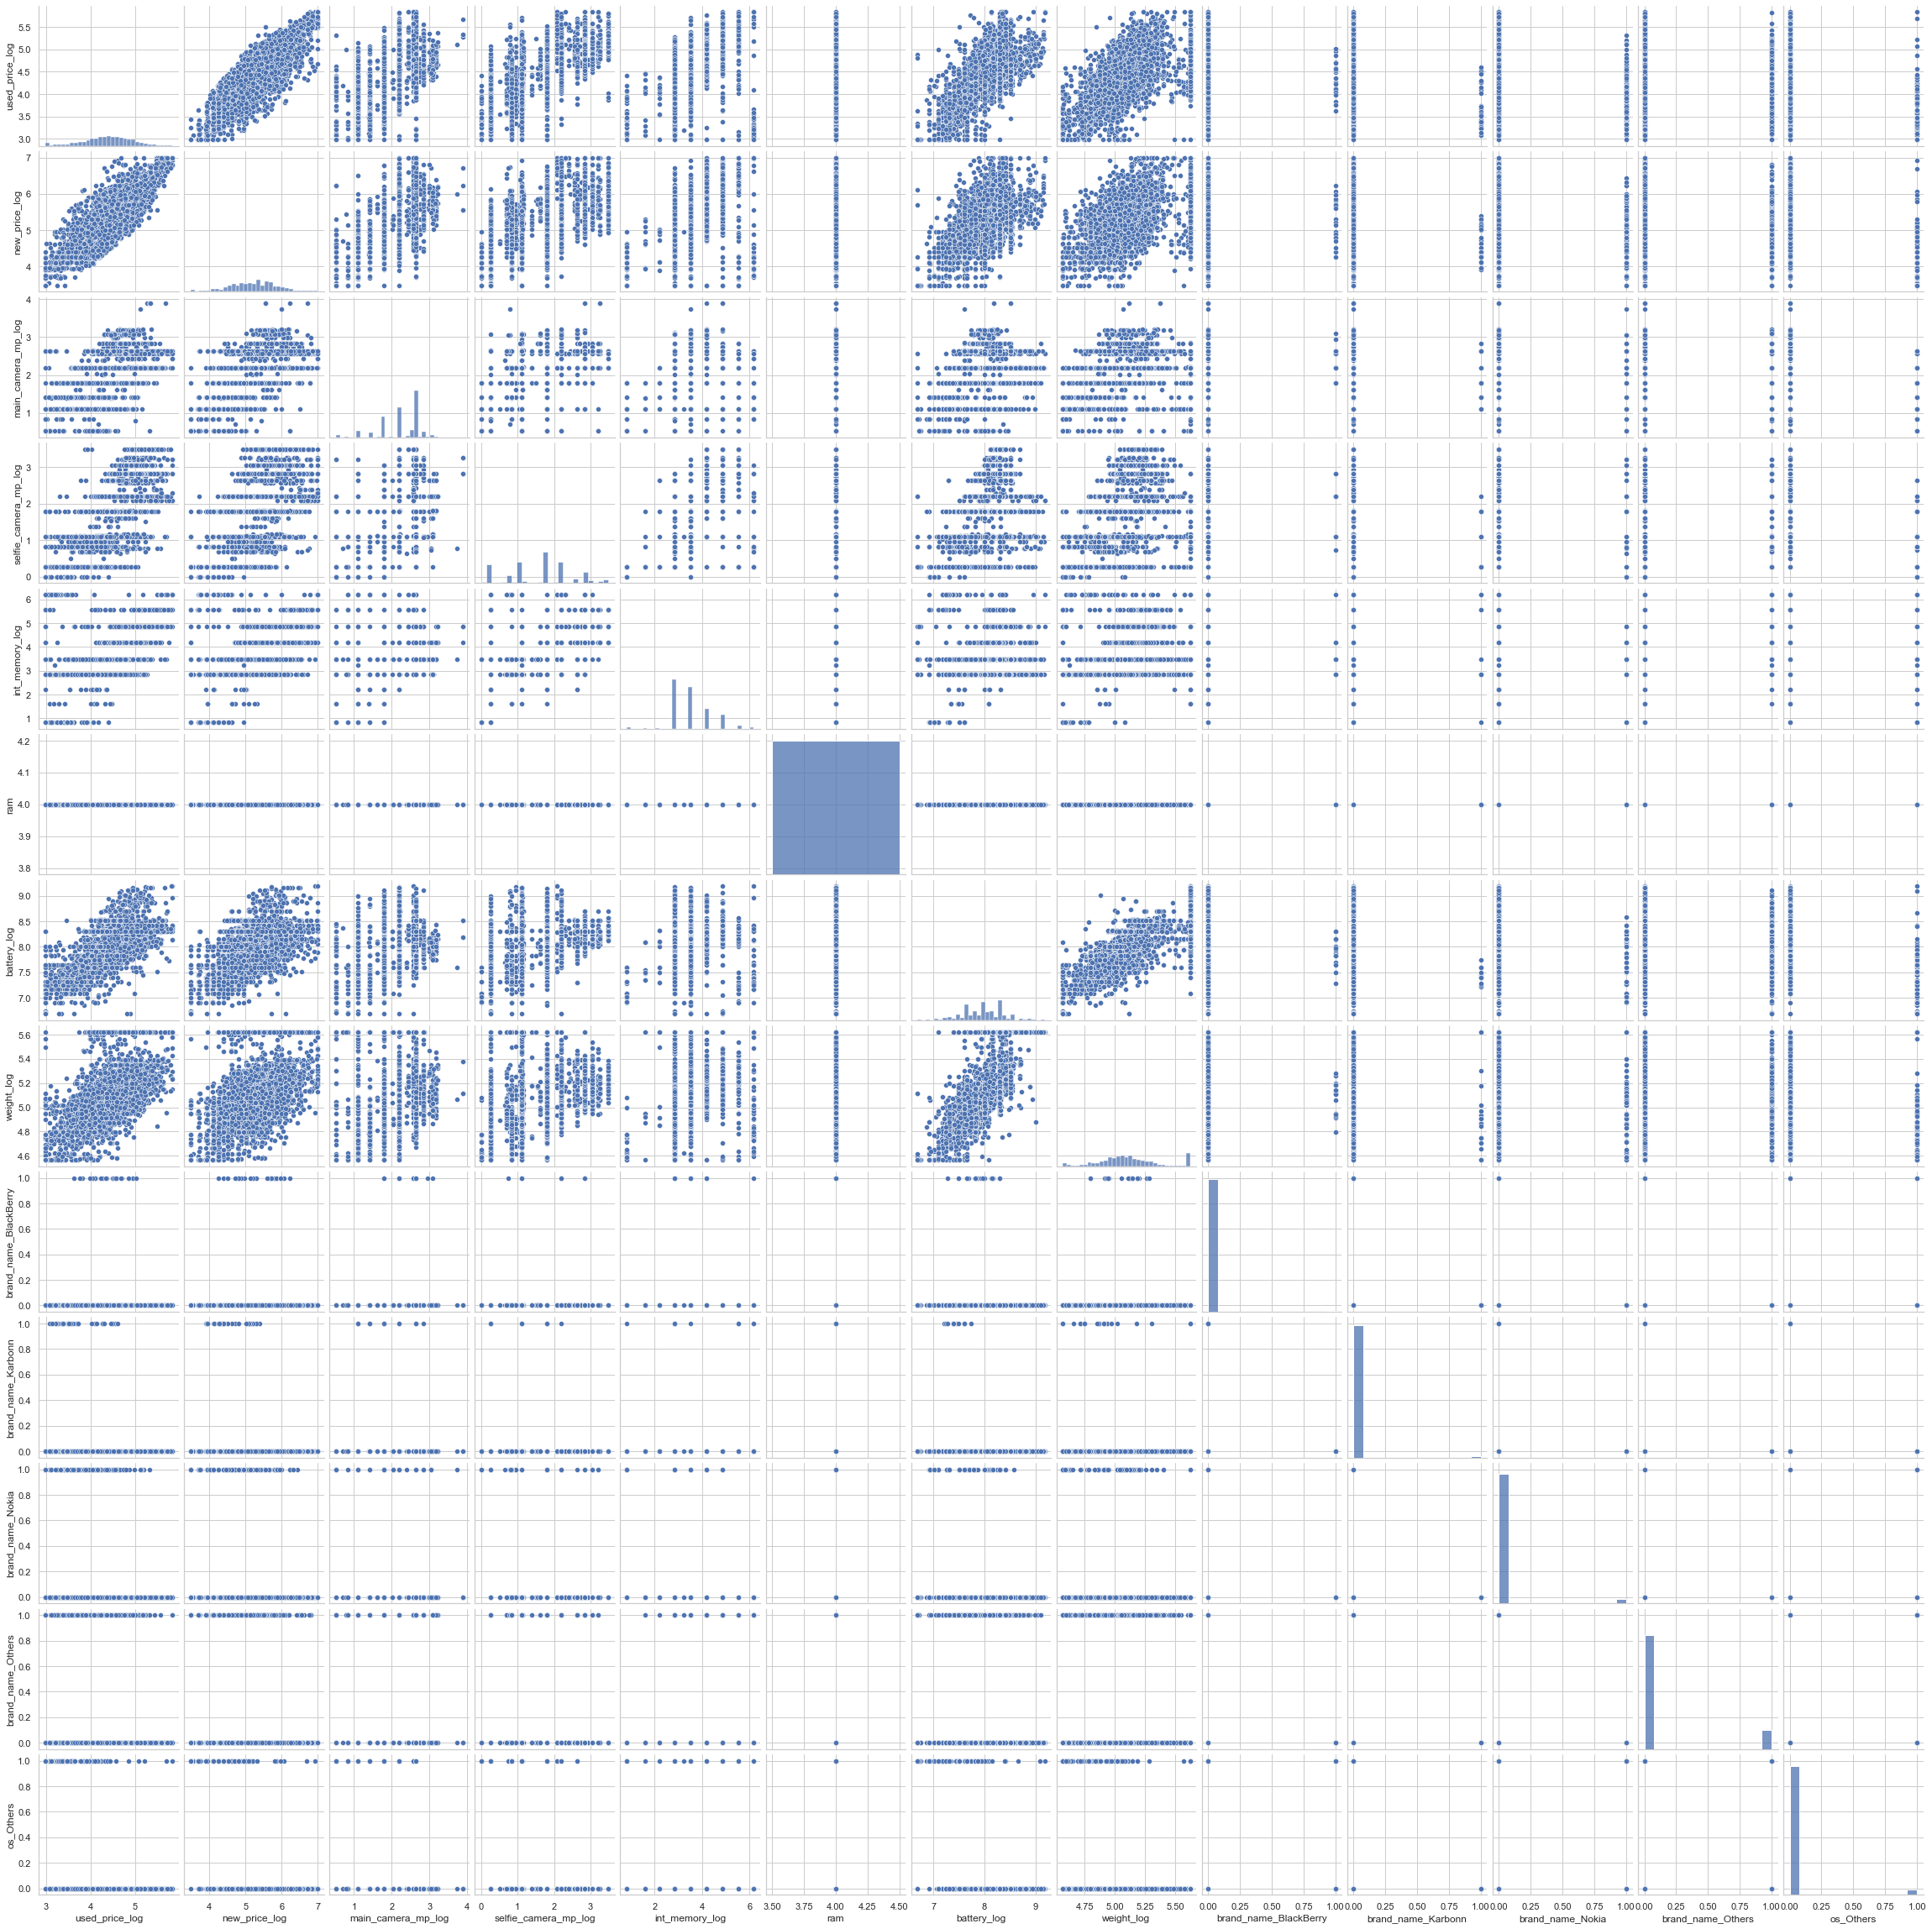

<IPython.core.display.Javascript object>

In [104]:
# checking the distribution of variables in training set with dependent variable
sns.pairplot(
    df3[
        [
            "used_price_log",
            "new_price_log",
            "main_camera_mp_log",
            "selfie_camera_mp_log",
            "int_memory_log",
            "ram",
            "battery_log",
            "weight_log",
            "brand_name_BlackBerry",
            "brand_name_Karbonn",
            "brand_name_Nokia",
            "brand_name_Others",
            "os_Others",
        ]
    ]
)
plt.show()

**From the above sns.pairplot(),We see that the `new_price_log`,`battery_log` and `weight_log` column has a slight nonlinear relationship with `used_price_log`. so, We can transform the `new_price_log`,`battery_log` and `weight_log` columns.**

In [105]:
# using square transformation
x_train1["new_price_log_sq"] = np.square(x_train1["new_price_log"])
x_train1["battery_log_sq"] = np.square(x_train1["battery_log"])
x_train1["weight_log_sq"] = np.square(x_train1["weight_log"])


# let's create a model with the transformed data
olsmod2 = sm.OLS(y_train, x_train1)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     888.4
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:55:35   Log-Likelihood:                 211.74
No. Observations:                2417   AIC:                            -393.5
Df Residuals:                    2402   BIC:                            -306.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.59

<IPython.core.display.Javascript object>

* We observe that the adj. R-squared has increased from 0.835 to 0.837. Let's check the residual plot again.

In [106]:
# let us recreate the dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres2.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres2.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,4.104130,3.810349,0.293781
1,4.460029,4.758053,-0.298024
2,4.328626,4.409047,-0.080421
3,4.295788,4.239650,0.056138
4,4.467975,4.453344,0.014631


<IPython.core.display.Javascript object>

**let's recreate the plot to show the `fitted values` vs `residuals`**

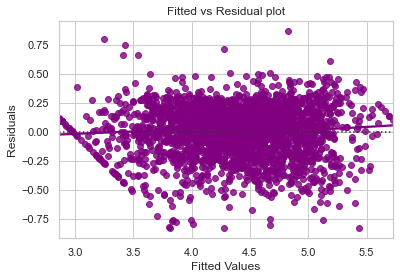

<IPython.core.display.Javascript object>

In [107]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations:**
- We observe that the pattern seems to be randomly distributed.We see no pattern in the plot above.
- Hence, the assumptions of linearity and independence are satisfied.

#### TEST FOR NORMALITY

* Error terms/residuals should be normally distributed.

* If the error terms are not normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

* Indication of non-normality: It suggests that there are a few unusual data points which must be studied closely to make a better model.

* Method of checking the Normality: It can be checked via QQ Plot - residuals following normal distribution will make a straight line plot, otherwise not.Another test to check for normality is the Shapiro-Wilk test.

* Ways to  Make residuals normal: We can apply transformations like log, exponential, arcsinh, etc as per our data.

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.

**Check the Normality**

* It can be checked via QQ Plot - residuals following normal distribution will make a straight line plot, otherwise not.

* Another test to check for normality is the Shapiro-Wilk test.

**How to Make residuals normal?**

* We can apply transformations like log, exponential, arcsinh, etc as per our data.

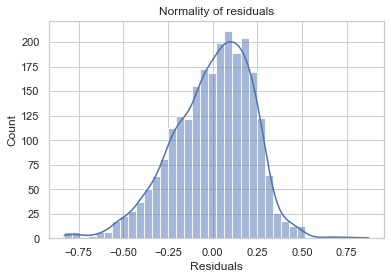

<IPython.core.display.Javascript object>

In [108]:
 ## Code to test the normality
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()


* The residual terms are normally distributed.

**The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.**

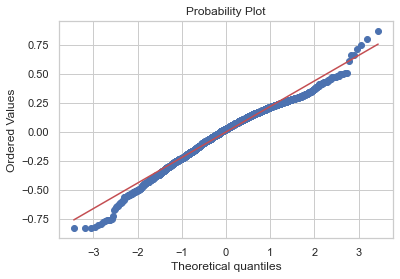

<IPython.core.display.Javascript object>

In [109]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* Most of the points are lying on the straight line in QQ plot 

The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

* Null hypothesis - Data is normally distributed.
* Alternate hypothesis - Data is not normally distributed.

In [110]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9815066456794739, pvalue=3.426280035379167e-17)

<IPython.core.display.Javascript object>

* Since p-value < 0.05, the residuals are not normal as per shapiro test.
* Strictly speaking - the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal

### TEST FOR HOMOSCEDASTICITY

* **Homoscedacity** - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.
* **Heteroscedacity** - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.
* **Reason for the test:** The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.
* **Ways to check if model has Heteroscedasticity:** Can use the goldfeldquandt test. If we get p-value > 0.05 we can say that the residuals are homoscedastic, otherwise they are heteroscedastic.
* **Dealing with Heteroscedasticity**
* Can be fixed via adding other important features or making transformations.

The null and alternate hypotheses of the goldfeldquandt test are as follows:

* **Null hypothesis :** Residuals are homoscedastic
* **Alternate hypothesis :** Residuals have hetroscedasticity

In [111]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

<IPython.core.display.Javascript object>

In [112]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train1)
lzip(name, test)

[('F statistic', 1.1246473203721055), ('p-value', 0.02127347703966385)]

<IPython.core.display.Javascript object>

* Since p-value < 0.05 we can say that the residuals are heteroscedastic.

### Final Model Summary
**Let's check the summary of our final model (olsres2)**

In [113]:
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     888.4
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:55:36   Log-Likelihood:                 211.74
No. Observations:                2417   AIC:                            -393.5
Df Residuals:                    2402   BIC:                            -306.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.59

<IPython.core.display.Javascript object>


### Observations

* R-squared of the model is 0.838 and adjusted R-squared is 0.837, which shows that the model is able to explain ~84% variance in the data. This is quite good.

* A unit increase in the new_price will result in a 0.7948 unit increase in the used_device price, all other variables remaining constant.

* A unit increase in the main_camera_mp  will result in a 0.1719 unit increase in the used_device price, all other variables remaining constant..

* A unit increase in the ram  will result in a  4.5306  unit increase in the used_device price, all other variables remaining constant.

### Predictions

#### Let's print the linear regression equation.

In [114]:
# let's check the model parameters
olsres2.params

const                    0.594513
ram                      2.378053
main_camera_mp_log       0.171888
selfie_camera_mp_log     0.147769
int_memory_log           0.053819
battery_log             -0.167429
weight_log              -4.108589
new_price_log            0.794246
brand_name_BlackBerry   -0.168502
brand_name_Karbonn       0.083940
brand_name_Nokia         0.109966
brand_name_Others       -0.026927
os_Others                0.077915
new_price_log_sq        -0.038471
battery_log_sq           0.014343
weight_log_sq            0.450436
dtype: float64

<IPython.core.display.Javascript object>

In [115]:
# Let us write the equation of linear regression
Equation = "used_price ="
print(Equation, end=" ")
for i in range(len(x_train1.columns)):
    if i == 0:
        print(olsres2.params[i], "+", end=" ")
    elif i != len(x_train1.columns) - 1:
        print(
            olsres2.params[i],
            "* (",
            x_train1.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres2.params[i], "* (", x_train1.columns[i], ")")

used_price = 0.5945131619005677 + 2.3780526476022814 * ( ram ) +  0.17188799006689742 * ( main_camera_mp_log ) +  0.14776912920889096 * ( selfie_camera_mp_log ) +  0.05381885134375754 * ( int_memory_log ) +  -0.16742945753219596 * ( battery_log ) +  -4.108588662976842 * ( weight_log ) +  0.7942461153068784 * ( new_price_log ) +  -0.1685023180172247 * ( brand_name_BlackBerry ) +  0.08393975248939192 * ( brand_name_Karbonn ) +  0.10996556060281051 * ( brand_name_Nokia ) +  -0.02692730970234168 * ( brand_name_Others ) +  0.07791534516602394 * ( os_Others ) +  -0.03847089857042468 * ( new_price_log_sq ) +  0.014342770915195258 * ( battery_log_sq ) +  0.45043648459005214 * ( weight_log_sq )


<IPython.core.display.Javascript object>

### We can now use the model for making predictions on the test data.

In [116]:
# train data columns
x_train1.columns

Index(['const', 'ram', 'main_camera_mp_log', 'selfie_camera_mp_log',
       'int_memory_log', 'battery_log', 'weight_log', 'new_price_log',
       'brand_name_BlackBerry', 'brand_name_Karbonn', 'brand_name_Nokia',
       'brand_name_Others', 'os_Others', 'new_price_log_sq', 'battery_log_sq',
       'weight_log_sq'],
      dtype='object')

<IPython.core.display.Javascript object>

In [117]:
# test data columns
x_test1.columns

Index(['const', 'ram', 'main_camera_mp_log', 'selfie_camera_mp_log',
       'int_memory_log', 'battery_log', 'weight_log', 'new_price_log',
       'brand_name_BlackBerry', 'brand_name_Karbonn', 'brand_name_Nokia',
       'brand_name_Others', 'os_Others'],
      dtype='object')

<IPython.core.display.Javascript object>

In [118]:
# transforming the 'new_price_log_sq', 'battery_log_sq', and 'weight_log_sq' column in the test data corresponding to the training set
x_test1["new_price_log_sq"] = np.square(x_test1["new_price_log"])
x_test1["battery_log_sq"] = np.square(x_test1["battery_log"])
x_test1["weight_log_sq"] = np.square(x_test1["weight_log"])

<IPython.core.display.Javascript object>

In [119]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsres2_train_perf = model_performance_regression(
    olsres2, x_train1, y_train
)  ## code to check the performance on train data
olsres2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.221675,0.176491,0.838142,0.837063,4.127306


<IPython.core.display.Javascript object>

In [120]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsres2_test_perf = model_performance_regression(
    olsres2, x_test1, y_test
)  ## Complete the code to check the performance on test data
olsres2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.225386,0.180403,0.840424,0.837921,4.220637


<IPython.core.display.Javascript object>

## Model performance evaluation

- The train and test $R^2$ are 0.8381 and 0.8404, indicating that the model explains 83.81% and 84.04% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train set(	0.221675) and test sets(0.225386) are also comparable.This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict used device price within a mean error of 0.1804 on the test set.

- MAPE of 4.22 on the test data means that we are able to predict within 4.22% of the used device pricing.

In [121]:
# Final Model parameters
olsres2.params

const                    0.594513
ram                      2.378053
main_camera_mp_log       0.171888
selfie_camera_mp_log     0.147769
int_memory_log           0.053819
battery_log             -0.167429
weight_log              -4.108589
new_price_log            0.794246
brand_name_BlackBerry   -0.168502
brand_name_Karbonn       0.083940
brand_name_Nokia         0.109966
brand_name_Others       -0.026927
os_Others                0.077915
new_price_log_sq        -0.038471
battery_log_sq           0.014343
weight_log_sq            0.450436
dtype: float64

<IPython.core.display.Javascript object>

##  Actionable Insights

- A unit increase in new price of the device(`new_price_log`) incerase the median used device  price by 0.7942 units, all other variables held constant.


- A unit increase in main camera Megapixel (`main_camera_mp_log`) increase the median used device price by 0.1718 units, all other variables held constant.


- A unit increase in selfie camera Megapixels (`selfie_camera_mp`) increases the median used price by 0.1477 units, all other variables held constant.


- A unit increase in internal memory in GB (`int_memory_log`) increases the median used device price by 0.053 units, all other variables held constant.


- A unit increase in ram memory in GB (`ram_log`) increase the median used device price by 2.378053 units, all other variables held constant.


- A unit increase in battery in mAh (`battery_log `) decreases the median used device price by -0.167429 units, all other variables held constant.


- A unit increase in weight in gm (`weight_log`) decreases the median used device price by -4.108589 units, all other variables held constant.


- Devices where brand name is BlackBerry(`brand_name_BlackBerry`) will have a  -0.168502 units lower median price than the ones where brand names are not BlackBerry.

- Devices where brand name is Nokia(`brand_name_Nokia`) will have a  0.109966 units higher median price than the ones where brand names are not Nokia.

- Devices where brand name is karbonn(`brand_name_Karbonn`) will have a 0.083940 units higher median price than the ones where brand names are not karbonn.


- Devices where operating system is others (`os_Others`) will have a  0.077915 units higher median price that the ones where operating systems are (`os_Android`,`os_IOS``os_Android`etc).

##  Recommendations

* **Price of used device is mostly influenced by the price of new device. An increase of one unit price of the new device increase the used device price by 0.7942 units.so, ReCell must consider the price of new device.**



* **Price of used device is more for the latest released devices.so, to minimise the price of the used device ReCell must take account on which year corresponding device was released.If device is released on latest year then price will be more.**



* **Ram is one of the influential factors deciding the used price device. one unit increase in ram in GB increase the price of the used device by 2.378053 units. so, ReCell must take into account of ram while selecting the used device.**



* **One Megapixel main and selfie camera increase the price of the used device by  0.1718 units and 0.1477 units respectively.so, ReCell must consider front and rear cameras while deciding the used device price.**




* **One unit internal memory increases the median used device price by 0.053 units. so,ReCell should consider internal memory for deciding the used device price.**



* **Since, one gm increase in weight decrease the device price by -4.108589 units so, ReCell must take into account the weight of the used device.**



* **ReCell must make balance while deciding the battery of the used device. one mAh increase in battery reduce the price of the device by -0.167429 units.**



* **Devices where operating system is others (os_Others) will have a 0.077915 units higher median price that the ones where operating systems are (os_Android,os_IOS,os_Android etc).It is to be noted that from exploratory data analysis we have seen that 93% of the devices are having android os.So, ReCell must take into account while choosing os.**